## Curve Fitting and Polynomial Fitting

In [1]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.optimize as optimize


## Curve fitting with error bars

### A lot of time we have data that we know should fit a certain function, but we don't know the parameter of the function.

### Here, we also have the standard deviation of the measurement at each point (sigma).  This is the error on each measurement.

### We are assuming the errors on all data are random, gaussian, symmetric, and independent of each other.

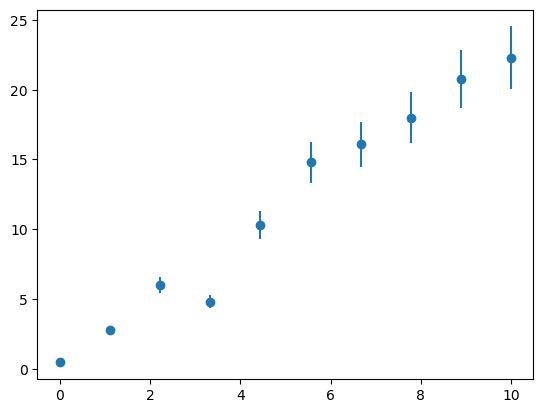

In [2]:
# Make some x and y data

x = np.linspace(0,10,10)
y = np.array([0.5, 2.8, 6.0 , 4.8, 10.3, 14.8, 16.1, 18.0,20.8, 22.3])

# Let's set sigma to 10% of the measured value of y.

sigma = y*0.1  


# Plot the data using the errorbar command:

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.show()


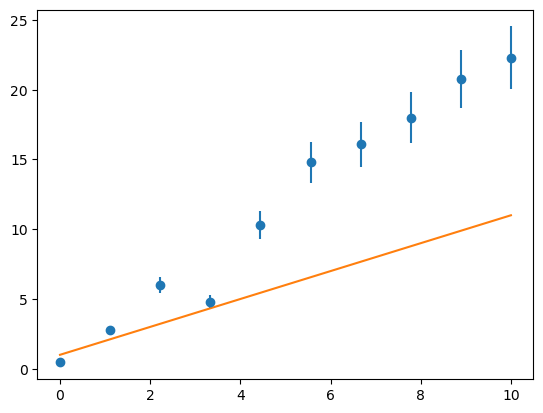

f(x)-y[x] =  [  0.5         -0.68888889  -2.77777778  -0.46666667  -4.85555556
  -8.24444444  -8.43333333  -9.22222222 -10.91111111 -11.3       ]
chisqr =  503.11851851851856
chisqr_w =  288.5684097898663


In [3]:
# Plot the data and and test fit:


def f(x,m,b):
    return m*x+b


# Now make an initial fit:

m = 1.0
b = 1.0

fit = f(x,m,b)   # Fitted y values

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.show()

chisqr = np.sum( ( fit - y )**2 )

chisqr_w = np.sum( ( fit - y )**2/sigma**2 )

print('f(x)-y[x] = ',fit-y)
print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)

In [4]:
# Do line fit by hand:

N = len(y)   # number of data points

Ex = np.sum(x/sigma**2)/N       # Sum of x[i]

Ey = np.sum(y/sigma**2)/N       # Sum of y[i]

Exx = np.sum(x**2/sigma**2)/N   # Sum of x[i]**2

Exy = np.sum(x*y/sigma**2)/N    # Sum of x[i] * y[i]

Esigma = np.sum(1/sigma**2)/N    # Sum of 1/sigma[i]**2

print(Esigma)

# Calulate m and b:

m_best = (Exy*Esigma -Ex*Ey)/(Exx*Esigma-Ex**2)

b_best = (Exx*Ey -Ex*Exy)/(Exx*Esigma-Ex**2)

print('Best fit m and b = ',m_best, b_best)

42.239894964542145
Best fit m and b =  2.0267480147835273 0.49297713018843925


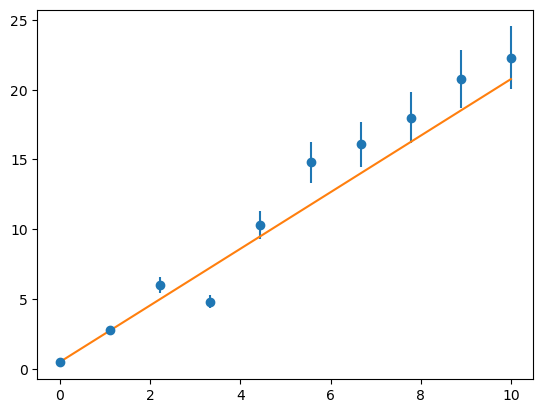

chisqr =  31.98213198125413
chisqr_w =  38.04461359448019


In [5]:
# Make a line with best fit and plot:

fit = f(x,m_best,b_best)

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.show()

chisqr = np.sum((fit-y)**2)
chisqr_w = np.sum((fit-y)**2/sigma**2)

print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)

In [6]:

# Let's define a function to determine the best linear fit:

def linefit(x,y,sigma):
    N = len(y)          # number of data points
    Ex = np.sum(x/sigma**2)/N       # Sum of x[i]
    Ey = np.sum(y/sigma**2)/N       # Sum of y[i]
    Exx = np.sum(x**2/sigma**2)/N   # Sum of x[i]**2
    Exy = np.sum(x*y/sigma**2)/N    # Sum of x[i] * y[i]
    Esigma = np.sum(1/sigma**2)/N    # Sum of 1/sigma[i]**2

    # Calulate m and b:

    m_best = (Exy*Esigma -Ex*Ey)/(Exx*Esigma-Ex**2)
    b_best = (Exx*Ey -Ex*Exy)/(Exx*Esigma-Ex**2)

    return m_best,b_best
    
    
# Use this function to find m and b:

m,b = linefit(x,y,sigma)

print('best fit m and b = ',m,b)




best fit m and b =  2.0267480147835273 0.49297713018843925


This is the best fit for the data with a linear function. Notice that this is really an analytical result, since we can compute $m_{best}$ and $b_{best}$ manually.

This is actually possible for all fit function that fits to a polynomial.

$f(x) = p[0]+p[1]x^1+p[2]x^2+p[3]x^3+...$

When you take the derivative with respect to p[i], you get n equations with n variables.

This is not possible if we want to this with non-polynomial functions however. So there's a numerical way to minimize $\chi^2$.


### For example, the above isn't the only way to do a linear fit

Let's look an example using the minimuze function:


In [7]:
# First, we define a function to minimize.  In this case, that will be chisqr:

def line_chi_squared_w(m_b,x,y,sigma):

    # We are only fitting for m and b, but we need the x and y values as extra arguments
    # m and b are passed as an array, so need to get each of them.

    m = m_b[0]
    b = m_b[1]
    
    fit = f(x,m,b)   # use out line function
    chisqr_w = np.sum((fit-y)**2/sigma**2)   # calculate the weighted chi^2
    return chisqr_w


# Then use scipy.optimize.minimize to find the best values of m and b:

# Make an inital guess at m and b:

p = np.array([1.0,1.0])

# Use minimize

best_fit = optimize.minimize(line_chi_squared_w,p,args=(x,y,sigma))

print(best_fit)

print(' ')
print(' ')


# The stuff returned is a bit complicated, but we want to extract m and b form best_fit.x:

m_best_min = best_fit.x[0]
b_best_min = best_fit.x[1]


# Print the m and b from this fit.
print('m and b from minimize = ',m_best_min,b_best_min)

# Print the origional best fit values
print('m and b from before = ',m_best,b_best)
    

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.04461359448021
        x: [ 2.027e+00  4.930e-01]
      nit: 4
      jac: [ 9.537e-07 -4.768e-07]
 hess_inv: [[ 2.801e-03 -3.353e-04]
            [-3.353e-04  1.224e-03]]
     nfev: 18
     njev: 6
 
 
m and b from minimize =  2.0267480092644092 0.4929771231786536
m and b from before =  2.0267480147835273 0.49297713018843925


<h3>

This is going to be slower for a linear fit, but the advantage is we could use any function, with any number of parameters.

There's another useful function in scipy we can use, optimize.curve_fit , that will let us skip defining a function to minimize.   curve_fit also has weighted with sigma built in:


In [8]:

# Use scipy.optimize.curve_fit to find the best values of m and b:

# Make an inital guess at m and b:

p = np.array([1.0,1.0])

# Use curve_fit.  Here, we pass x and y values, and the array with our geuss at m and b:

popt,pcov = optimize.curve_fit(f,x,y,p,sigma=sigma,absolute_sigma=True)   # absolute_sigma=True is used if we know the errors on the data

# curve_fit returns two arrays, the parameters fits (popt) and the covarience martix (pcov)

print('popt = ',popt)
print('pcov = ',pcov)

print(' ')
print(' ')


# m and b will be the best fit paramets in popt:

m_best_curve = popt[0]
b_best_curve = popt[1]

# Print the m and b from this fit.
print('m and b from curve_fit = ',m_best_curve,b_best_curve)

# Print the origional best fit values
print('m and b from before = ',m_best,b_best)


# But we can also use the covariance matrix.  For example, we can calculate the standard deviation of each parameter:

perr = np.sqrt(np.diag(pcov))

print('perr = ',perr)

print(' ')

m_err = perr[0]
b_err = perr[1]

# Print parameters with error bars:
print('m = ',m_best_curve,'+/-',m_err)
print('b = ',b_best_curve,'+/-',b_err)



popt =  [2.02674801 0.49297713]
pcov =  [[ 0.00560122 -0.00067067]
 [-0.00067067  0.00244773]]
 
 
m and b from curve_fit =  2.0267480149277537 0.49297712825752815
m and b from before =  2.0267480147835273 0.49297713018843925
perr =  [0.07484127 0.04947457]
 
m =  2.0267480149277537 +/- 0.07484126616310248
b =  0.49297712825752815 +/- 0.049474569615640986


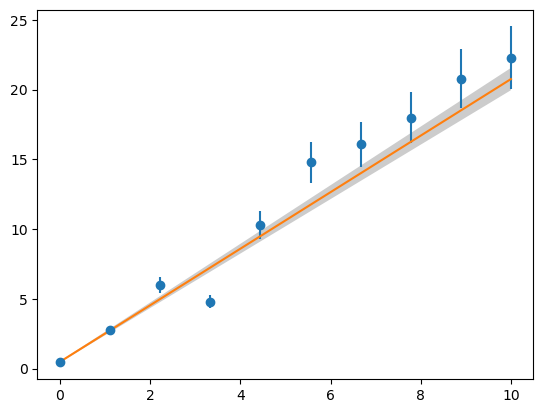

In [9]:
# Plot the best fit, along with the 1-sigma error region:

fit = f(x,m_best_curve,b_best_curve)  # best fit line

y1 = f(x,m_best_curve+m_err,b_best_curve+b_err)  # values plus 1-sigma

y2 = f(x,m_best_curve-m_err,b_best_curve-b_err)  # values minus 1-sigma

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x,y2,y1, facecolor="gray", alpha=0.4)
plt.show()


<h3>

A fourth way to fit a line is to use np.polyfit.  Using this, we don't even need to define a function to fit, just use a 1-degree polynomial.  It will also do weighting:

In [27]:
# Fit a line on unweighted data:

#sigma = np.zeros(y.size)+2
sigma = y*0.1

p = np.polyfit(x,y,1)

print('unweighted p = ',p)


# Fit weighed data, using weight = 1/sigma.  The smaller the sigma, the higher the weight

weight = 1/sigma

# I'm using popt and pcov so it's the same return format as curve_fit

popt,pcov = np.polyfit(x,y,1,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data

perr = np.sqrt(np.diag(pcov))

print(popt)
print(pcov)

print(perr)


m_best_curve = popt[0]
b_best_curve = popt[1]
m_err = perr[0]
b_err = perr[1]


# Print parameters with error bars:
print('m = ',m_best_curve,'+/-',m_err)
print('b = ',b_best_curve,'+/-',b_err)

fit = f(x,m_best_curve,b_best_curve)  # best fit line

chisqr_w = np.sum((fit-y)**2/sigma**2)
print('chisqr_w = ',chisqr_w)


unweighted p =  [2.29418182 0.16909091]
[2.02674801 0.49297713]
[[ 0.00560122 -0.00067067]
 [-0.00067067  0.00244773]]
[0.07484127 0.04947457]
m =  2.0267480147835273 +/- 0.07484126643475644
b =  0.492977130188439 +/- 0.049474569740909184
chisqr_w =  38.04461359448019


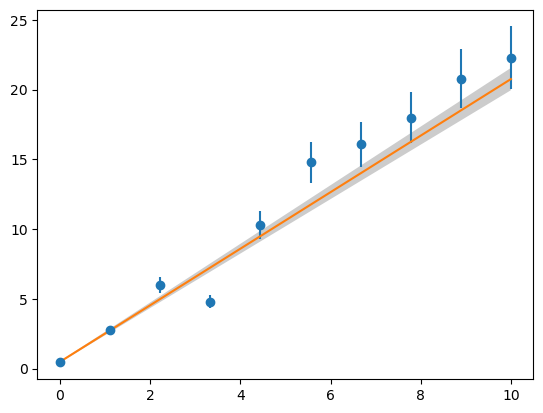

In [28]:

y1 = f(x,m_best_curve+m_err,b_best_curve+b_err)  # values plus 1-sigma

y2 = f(x,m_best_curve-m_err,b_best_curve-b_err)  # values minus 1-sigma

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x,y2,y1, facecolor="gray", alpha=0.4)
plt.show()


## Higher order polynomials

<h3>
    
We can also use polyfit to fit higher-order polynomials, without needed to define any new functions.  A higher order polynomial will always produce a better chi^2

In [29]:

# Fit weighed data, using weight = 1/sigma:

weight = 1/sigma

# Now use a 2-degree polynomial

popt2,pcov2 = np.polyfit(x,y,2,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data

perr2 = np.sqrt(np.diag(pcov2))

print('popt = ',popt2)

print('perr = ',perr2)

print(' ')

for i in np.arange(popt2.size):
    print('parameter',i,'=',popt2[i],'+/-',perr2[i])

fit2 = np.polyval(popt2,x)   # Function to make polynomial

print(' ')

chisqr_w2 = np.sum((fit2-y)**2/sigma**2)
print('chisqr_w1 = ',chisqr_w)
print('chisqr_w2 = ',chisqr_w2)



popt =  [0.06765772 1.65891869 0.50745308]
perr =  [0.02659736 0.16281986 0.04980078]
 
parameter 0 = 0.06765771512324764 +/- 0.02659736129765855
parameter 1 = 1.6589186942473357 +/- 0.16281985629793239
parameter 2 = 0.5074530754376361 +/- 0.049800777959255596
 
chisqr_w1 =  38.04461359448019
chisqr_w2 =  31.573819974218523


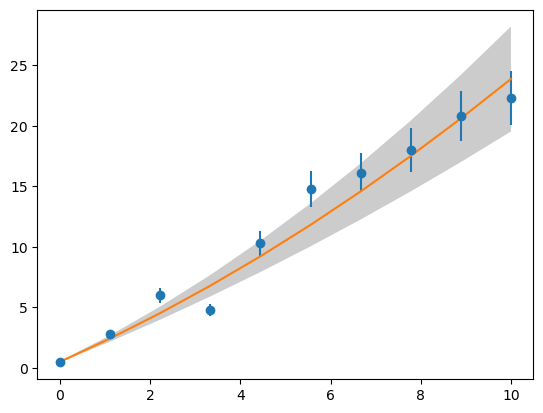

In [30]:
# Let's make a plot of our degree 2 polynomial fit:


y1_2 = np.polyval(popt2+perr2,x)  # values plus 1-sigma

y2_2 =  np.polyval(popt2-perr2,x) # values minus 1-sigma

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit2)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x,y2_2,y1_2, facecolor="gray", alpha=0.4)
plt.show()


## Reduced chi^2

<h3>

chi^2 is always smaller when we add more degrees of freedom to our polynomial.  We can use another measure to compare models called reduced chi squared.

For this, reduced chi squared is chi^2 divided by the degrees of freedom:

$\chi_\nu^2 = \chi^2/\nu$

Where the degrees of freedom $\nu$ is the numer of data points $n$ minus the numer of fitted parameters $m$:

$\nu = n - m$

Applying this to out data:

In [31]:
n = y.size

print('n = ',n)

red_chisqr1 = chisqr_w/(n-2)
red_chisqr2 = chisqr_w2/(n-3)

print('reduced chisqr deg 1 = ',red_chisqr1)
print('reduced chisqr deg 2 = ',red_chisqr2)


n =  10
reduced chisqr deg 1 =  4.755576699310024
reduced chisqr deg 2 =  4.5105457106026465


### Degree 2 is a bit better in this example, but not much.  Lets try higher order polynomials:

In [32]:
# Degree 3

popt3,pcov3 = np.polyfit(x,y,3,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data
perr3 = np.sqrt(np.diag(pcov3))

fit3 = np.polyval(popt3,x)   # Function to make polynomial

chisqr_w3 = np.sum((fit3-y)**2/sigma**2)
red_chisqr3 = chisqr_w3/(n-4)


# Degree 4

popt4,pcov4 = np.polyfit(x,y,4,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data
perr4 = np.sqrt(np.diag(pcov4))

fit4 = np.polyval(popt4,x)   # Function to make polynomial

chisqr_w4 = np.sum((fit4-y)**2/sigma**2)
red_chisqr4 = chisqr_w4/(n-5)


# Degree 5

popt5,pcov5 = np.polyfit(x,y,5,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data
perr5 = np.sqrt(np.diag(pcov5))

fit5 = np.polyval(popt5,x)   # Function to make polynomial

chisqr_w5 = np.sum((fit5-y)**2/sigma**2)
red_chisqr5 = chisqr_w5/(n-6)


print('chi^2 keep getting smaller...')
print('chisqr deg 1 = ',chisqr_w)
print('chisqr deg 2 = ',chisqr_w2)
print('chisqr deg 3 = ',chisqr_w3)
print('chisqr deg 4 = ',chisqr_w4)
print('chisqr deg 5 = ',chisqr_w5)


print(' ')

print('... but reduced chi^2 eventually hits a minimum:')
print('reduced chisqr deg 1 = ',red_chisqr1)
print('reduced chisqr deg 2 = ',red_chisqr2)
print('reduced chisqr deg 3 = ',red_chisqr3)
print('reduced chisqr deg 4 = ',red_chisqr4)
print('reduced chisqr deg 5 = ',red_chisqr5)


print(' ')
print(' ')

print('If you fit with 9 degree polynomial (10 parameters), you get a perfect fit, with no information:')
# Degree 9

popt9,pcov9 = np.polyfit(x,y,9,w=weight,cov='unscaled')   # cov='unscaled' is needed if we know the errors in the data
perr9 = np.sqrt(np.diag(pcov9))

fit9 = np.polyval(popt9,x)   # Function to make polynomial

chisqr_w9 = np.sum((fit9-y)**2/sigma**2)

print('chisqr deg 9 = ',chisqr_w9)

red_chisqr9 = chisqr_w9/(n-10)
print('reduced chisqr deg 9 = ',red_chisqr9)



chi^2 keep getting smaller...
chisqr deg 1 =  38.04461359448019
chisqr deg 2 =  31.573819974218523
chisqr deg 3 =  31.52453817416159
chisqr deg 4 =  22.50295897724366
chisqr deg 5 =  19.75681353236373
 
... but reduced chi^2 eventually hits a minimum:
reduced chisqr deg 1 =  4.755576699310024
reduced chisqr deg 2 =  4.5105457106026465
reduced chisqr deg 3 =  5.254089695693598
reduced chisqr deg 4 =  4.500591795448733
reduced chisqr deg 5 =  4.939203383090932
 
 
If you fit with 9 degree polynomial (10 parameters), you get a perfect fit, with no information:
chisqr deg 9 =  2.539233254461651e-20
reduced chisqr deg 9 =  inf


/var/folders/kx/h2dwjw7d65g6pv5hmhbnkfcc0000gp/T/ipykernel_94392/142352711.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  red_chisqr9 = chisqr_w9/(n-10)


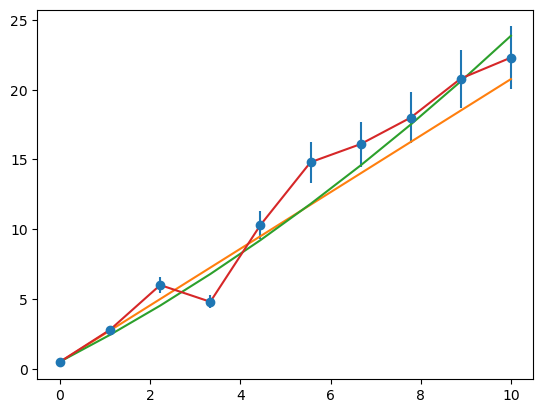

In [36]:
plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.plot(x,fit2)
#plt.plot(x,fit3)
#plt.plot(x,fit4)
#plt.plot(x,fit5)
plt.plot(x,fit9)
#plt.fill_between(x,y2_2,y1_2, facecolor="gray", alpha=0.4)
plt.show()
